In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#  Packages & Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as skl
import warnings
import statsmodels.api as sm

from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, ShuffleSplit, validation_curve, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, RobustScaler, LabelEncoder, scale, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_selection import RFE,SelectFromModel

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import make_classification

from xgboost import XGBClassifier 

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter('ignore')


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#Load Datasets
train_data = pd.read_csv("training_set_values.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_data = pd.read_csv("test_set_values.csv")


In [ ]:
#Join Labels with Train data
train_labels = train_labels.drop(columns='id')
train_data = train_data.join(train_labels)


In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
train_data.info()

In [ ]:
test_data.info()

In [ ]:
#Drop id and recorded from train dataset 
train_data= train_data.drop(columns=['id'])
train_data= train_data.drop(columns=['recorded_by'])


In [ ]:
#Drop id and recorded from test dataset 
test_data= test_data.drop(columns=['id'])
test_data= test_data.drop(columns=['recorded_by'])

In [ ]:
# Differentiate categorical from numerical variables, even though some are encoded already,
num_train_data = train_data[[
# 'id',
'amount_tsh',
'gps_height',
'num_private',
'population',
]]

other_train_data = train_data[[ 
'longitude',
'latitude',
'date_recorded',
]]
    
categorical_columns = list(set(train_data.columns) - set(num_train_data.columns) - set(other_train_data.columns))
cat_train_data = train_data.loc[:,categorical_columns]


In [ ]:
train_data.head()


In [ ]:
train_data_missing = train_data.isna()
train_data_missing = (train_data_missing.sum()/len(train_data))*100
train_data_missing = train_data_missing[train_data_missing!=0]
train_data_missing

In [ ]:
column_list = cat_train_data.columns.values.tolist()
print(column_list)

In [ ]:
def unique_values(df):
    for column_name in column_list:
        return print(df[column_name].unique())

In [ ]:
for column_name in column_list:
      print(column_name,len(train_data[column_name].unique()),train_data[column_name].unique())


In [ ]:
#Fields that require intensive review are: installer, funder, scheme_name, ward, lga, wpt_name, subvillage
grouping_col = train_data[[
'installer',
'funder',
'scheme_name',
'ward',
'lga',
'wpt_name',
'subvillage'
]]

In [ ]:
for i in grouping_col.columns:
    inspect = grouping_col[i].value_counts()/len(grouping_col)
    print(inspect.head(10))

#  Exploratory Data Analysis 

In [ ]:
plt.pyplot.show()
ax = ((train_data.status_group.value_counts().sort_index()/len(train_data))*100).plot(kind='bar')
plt.pyplot.title('Distribution of status_group variable ')
plt.pyplot.xlabel('status_group')
plt.pyplot.ylabel('Percentage')

In [ ]:
functional = len(train_data[train_data['status_group']=='functional'])
func_need_repair = len(train_data[train_data['status_group']=='functional needs repair'])
non_func = len(train_data[train_data['status_group']=='non functional'])

pct_functional = functional/(functional+func_need_repair+non_func)
print("percentage of functional is", pct_functional*100)
pct_func_need_repair = func_need_repair/(functional+func_need_repair+non_func)
print("percentage of functional needs repair", pct_func_need_repair*100)
pct_non_func = non_func/(functional+func_need_repair+non_func)
print("percentage of non functional", pct_non_func*100)

In [ ]:
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),cbar=True,fmt =' .2f', annot=True, cmap='viridis')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type')
((train_data[train_data.status_group=='non functional'].extraction_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='extraction_type')
((train_data[train_data.status_group=='functional needs repair'].extraction_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='extraction_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of extraction_type variable ')
plt.pyplot.xlabel('extraction_type')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type_group')
((train_data[train_data.status_group=='non functional'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='extraction_type_group')
((train_data[train_data.status_group=='functional needs repair'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='extraction_type_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of extraction_type_group variable ')
plt.pyplot.xlabel('extraction_type_group')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type_class')
((train_data[train_data.status_group=='non functional'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='extraction_type_class')
((train_data[train_data.status_group=='functional needs repair'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='extraction_type_class')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of extraction_type_class variable ')
plt.pyplot.xlabel('extraction_type_class')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].source.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source')
((train_data[train_data.status_group=='non functional'].source.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source')
((train_data[train_data.status_group=='functional needs repair'].source.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of source variable ')
plt.pyplot.xlabel('source')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].source_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source_class')
((train_data[train_data.status_group=='non functional'].source_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source_class')
((train_data[train_data.status_group=='functional needs repair'].source_class.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source_class')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of source_class variable ')
plt.pyplot.xlabel('source_class')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].payment.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='payment')
((train_data[train_data.status_group=='non functional'].payment.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='payment')
((train_data[train_data.status_group=='functional needs repair'].payment.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='payment')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of payment variable ')
plt.pyplot.xlabel('payment')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].basin.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='basin')
((train_data[train_data.status_group=='non functional'].basin.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='basin')
((train_data[train_data.status_group=='functional needs repair'].basin.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='basin')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of basin variable ')
plt.pyplot.xlabel('basin')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].management_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='management_group')
((train_data[train_data.status_group=='non functional'].management_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='management_group')
((train_data[train_data.status_group=='functional needs repair'].management_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='management_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of management_group variable ')
plt.pyplot.xlabel('management_group')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quality_group')
((train_data[train_data.status_group=='non functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quality_group')
((train_data[train_data.status_group=='functional needs repair'].quality_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quality_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of quality_group variable ')
plt.pyplot.xlabel('quality_group')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].source_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source_type')
((train_data[train_data.status_group=='non functional'].source_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source_type')
((train_data[train_data.status_group=='functional needs repair'].source_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of source_type variable ')
plt.pyplot.xlabel('source_type')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].scheme_management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='scheme_management')
((train_data[train_data.status_group=='non functional'].scheme_management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='scheme_management')
((train_data[train_data.status_group=='functional needs repair'].scheme_management.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='scheme_management')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of scheme_management variable ')
plt.pyplot.xlabel('scheme_management')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].public_meeting.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='public_meeting')
((train_data[train_data.status_group=='non functional'].public_meeting.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='public_meeting')
((train_data[train_data.status_group=='functional needs repair'].public_meeting.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='public_meeting')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of public_meeting variable ')
plt.pyplot.xlabel('public_meeting')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].water_quality.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='water_quality')
((train_data[train_data.status_group=='non functional'].water_quality.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='water_quality')
((train_data[train_data.status_group=='functional needs repair'].water_quality.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='water_quality')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of water_quality variable ')
plt.pyplot.xlabel('water_quality')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].waterpoint_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='waterpoint_type')
((train_data[train_data.status_group=='non functional'].waterpoint_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='waterpoint_type')
((train_data[train_data.status_group=='functional needs repair'].waterpoint_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='waterpoint_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of waterpoint_type variable ')
plt.pyplot.xlabel('waterpoint_type')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='waterpoint_type_group')
((train_data[train_data.status_group=='non functional'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='waterpoint_type_group')
((train_data[train_data.status_group=='functional needs repair'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='waterpoint_type_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of waterpoint_type_group variable ')
plt.pyplot.xlabel('waterpoint_type_group')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].permit.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='permit')
((train_data[train_data.status_group=='non functional'].permit.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='permit')
((train_data[train_data.status_group=='functional needs repair'].permit.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='permit')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of permit variable ')
plt.pyplot.xlabel('permit')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].construction_year.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='construction_year')
((train_data[train_data.status_group=='non functional'].construction_year.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='construction_year')
((train_data[train_data.status_group=='functional needs repair'].construction_year.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='construction_year')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of construction_year variable ')
plt.pyplot.xlabel('construction_year')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].payment_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='payment_type')
((train_data[train_data.status_group=='non functional'].payment_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='payment_type')
((train_data[train_data.status_group=='functional needs repair'].payment_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='payment_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of payment_type variable ')
plt.pyplot.xlabel('payment_type')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].quantity.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quantity')
((train_data[train_data.status_group=='non functional'].quantity.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quantity')
((train_data[train_data.status_group=='functional needs repair'].quantity.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quantity')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of quantity variable ')
plt.pyplot.xlabel('quantity')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].district_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='district_code')
((train_data[train_data.status_group=='non functional'].district_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='district_code')
((train_data[train_data.status_group=='functional needs repair'].district_code.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='district_code')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of district_code variable ')
plt.pyplot.xlabel('district_code')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].region.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='region')
((train_data[train_data.status_group=='non functional'].region.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='region')
((train_data[train_data.status_group=='functional needs repair'].region.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='region')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of region variable ')
plt.pyplot.xlabel('region')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].region_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='region_code')
((train_data[train_data.status_group=='non functional'].region_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='region_code')
((train_data[train_data.status_group=='functional needs repair'].region_code.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='region_code')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of region_code variable ')
plt.pyplot.xlabel('region_code')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quality_group')
((train_data[train_data.status_group=='non functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quality_group')
((train_data[train_data.status_group=='functional needs repair'].quality_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quality_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of quality_group variable ')
plt.pyplot.xlabel('quality_group')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='management')
((train_data[train_data.status_group=='non functional'].management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='management')
((train_data[train_data.status_group=='functional needs repair'].management.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='management')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of management variable ')
plt.pyplot.xlabel('management')
plt.pyplot.ylabel('Percentage')

In [ ]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].lga.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='lga')
((train_data[train_data.status_group=='non functional'].lga.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='lga')
((train_data[train_data.status_group=='functional needs repair'].lga.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='lga')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of lga variable ')
plt.pyplot.xlabel('lga')
plt.pyplot.ylabel('Percentage')

In [ ]:
sns.distplot(train_data['amount_tsh'], hist = False, kde = True)


In [ ]:
sns.distplot(train_data['gps_height'], hist = False, kde = True)

In [1]:
sns.distplot(train_data['population'], hist = False, kde = True)

NameError: name 'sns' is not defined

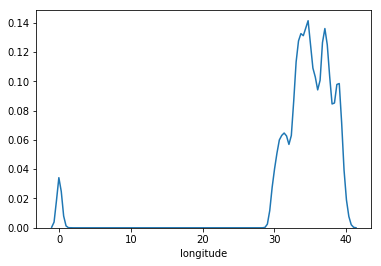

In [50]:
sns.distplot(train_data['longitude'], hist = False, kde = True)

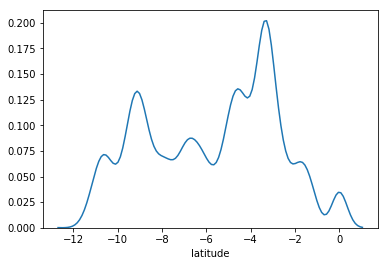

In [51]:
sns.distplot(train_data['latitude'], hist = False, kde = True)

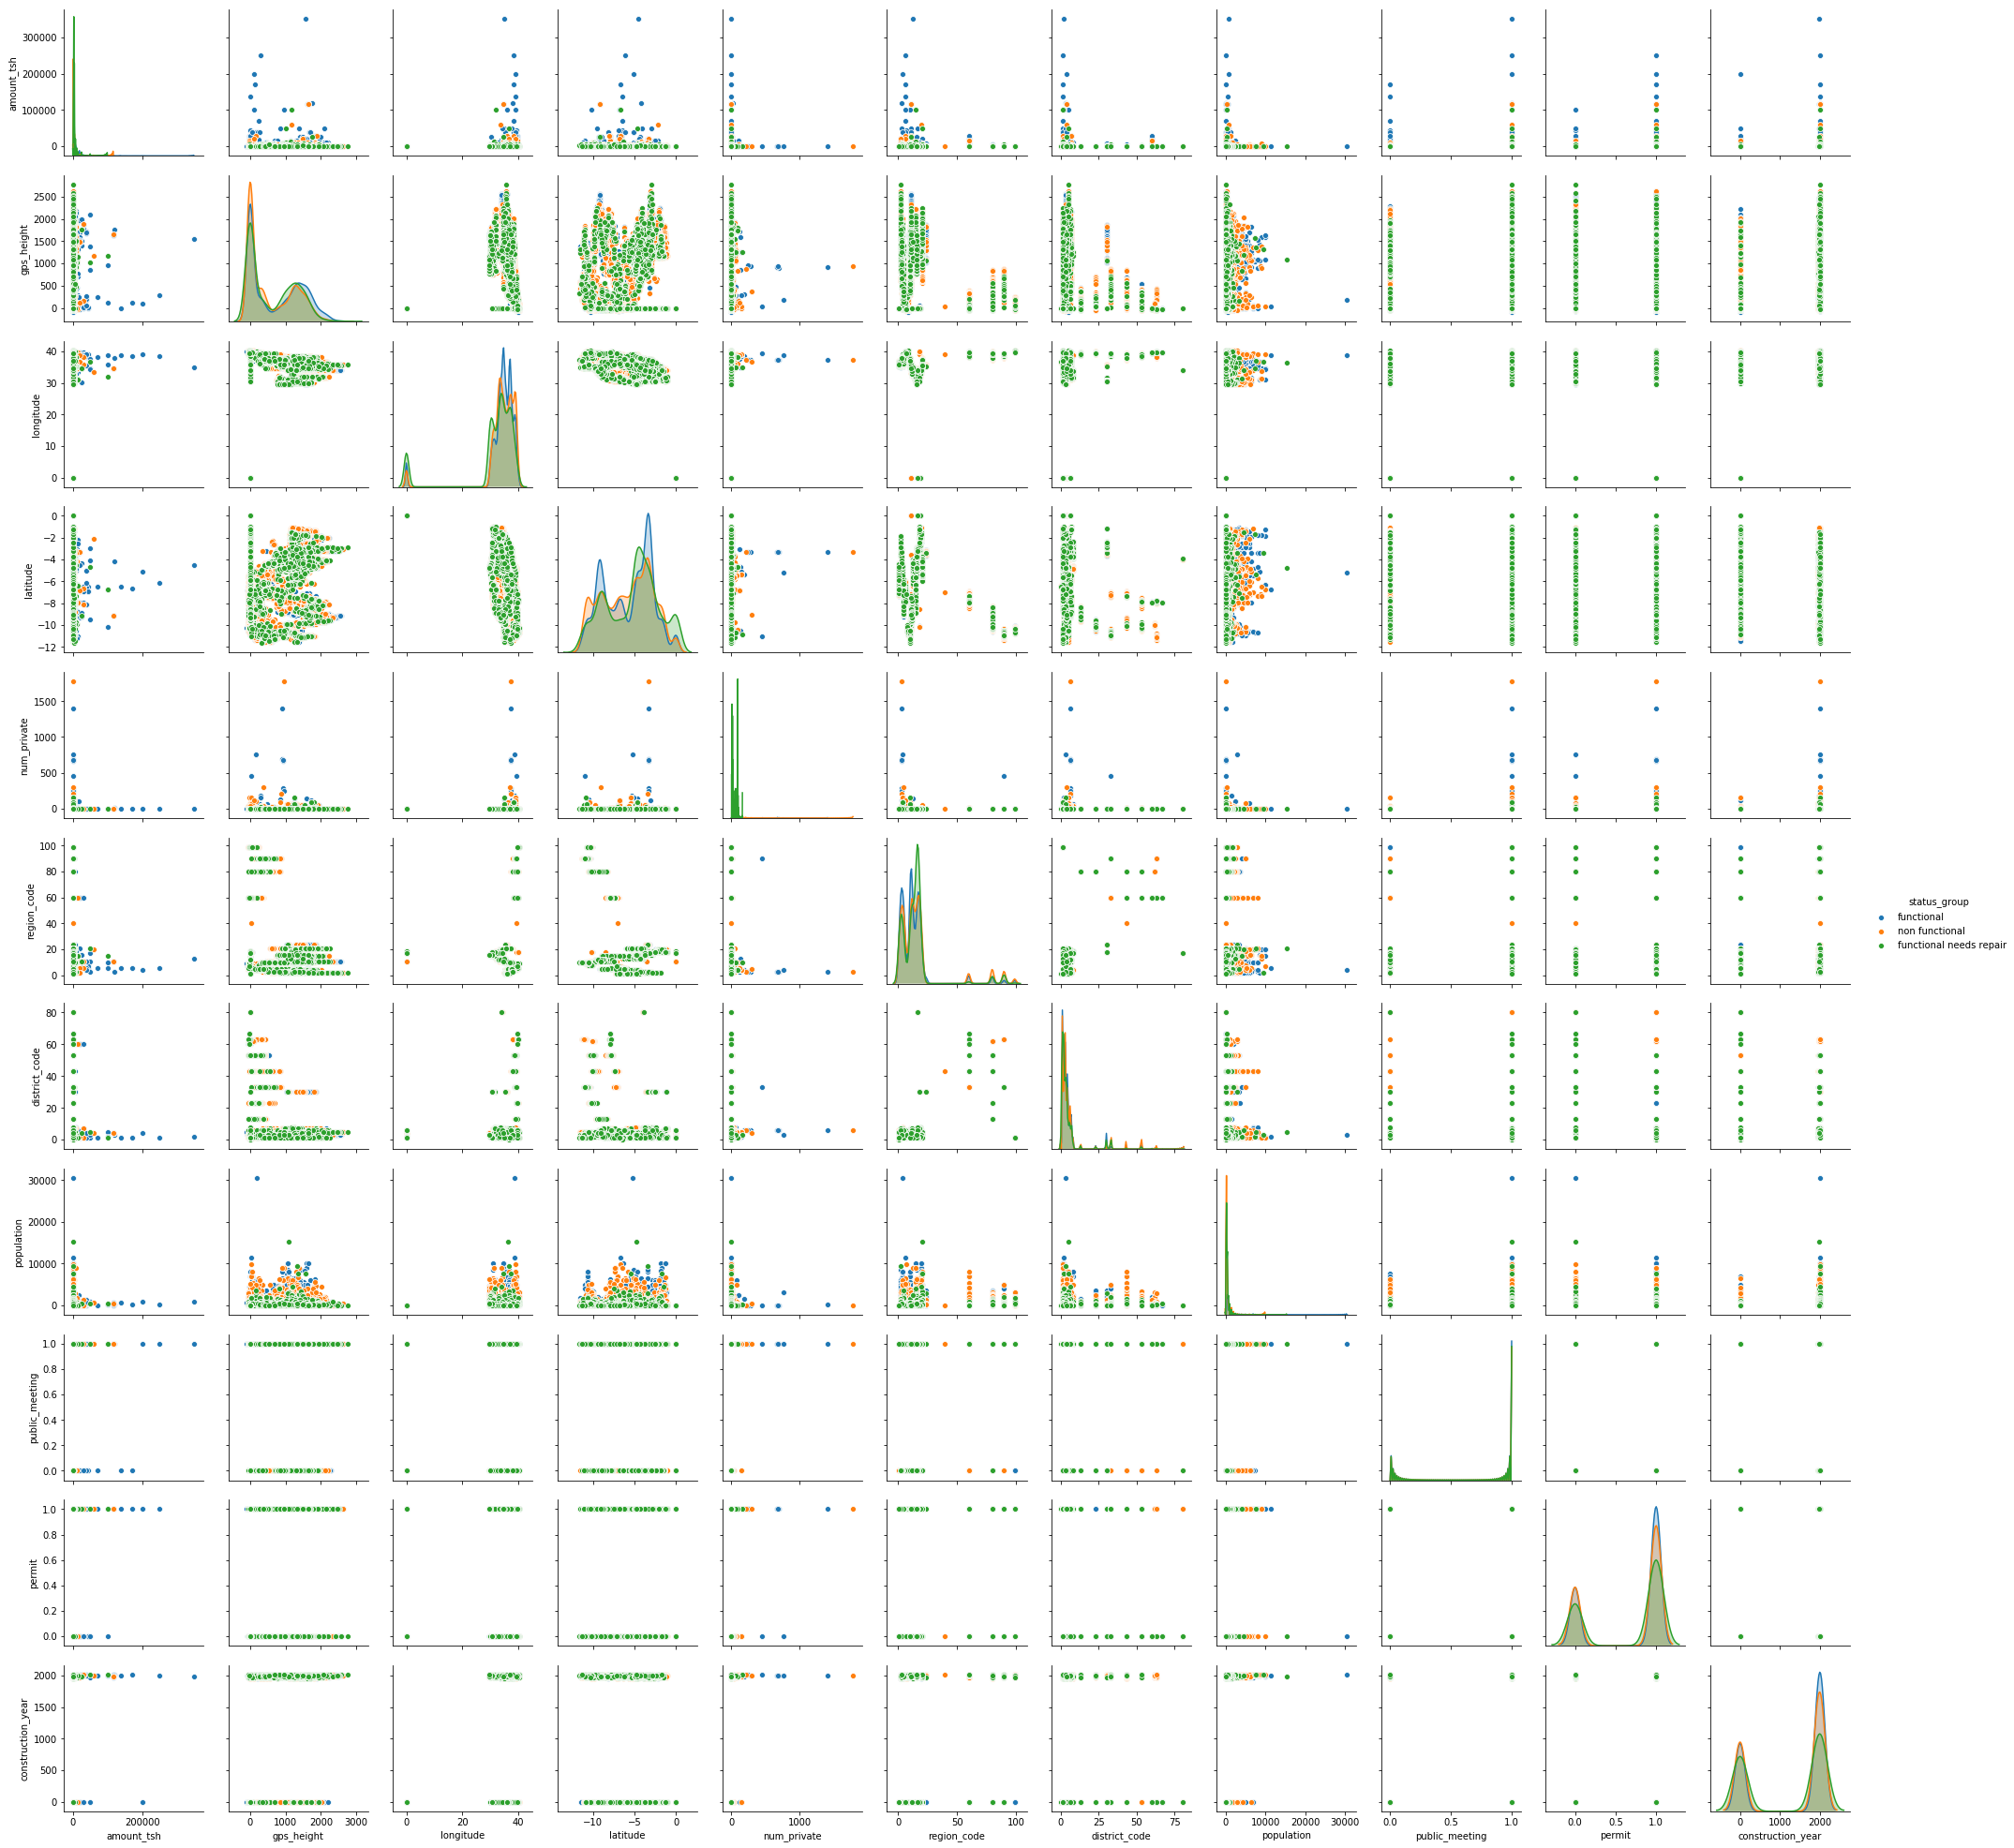

In [52]:
sns.pairplot(train_data, hue="status_group")